# Section 2.4 — Continuous random variables

This notebook contains all the code examples from **Section 2.4 Continuous random variables**
of the **No Bullshit Guide to Statistics**.

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (7, 2)})
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)
%config InlineBackend.figure_format = 'retina'

In [3]:
%pip install -q ministats


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Definitions


### Random variables

- **random variable** $X$: a quantity that can take on different values.
- **sample space** $\mathcal{X}$: describes the set of all possible outcomes of the random variable $X$.
- **outcome**: a particular value $\{X = x\}$ that can occur as a result of observing the random variable $X$.
- **event** subset of the sample space $\{a \leq X \leq b\}$ that can occur as a result of observing the random variable $X$.
- $f_X$: the **probability density function** (PDF)
  is a function that assigns probabilities to the different outcome in the sample space of a random variable.
  The probability distribution function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to \mathbb{R}$.

## Calculus prerequisites

### Functions

In Python, we define functions using the `def` keyword.
For example, the code cell below defines the function $g(x)=\frac{1}{2}x$,
then evaluate it on the input $x=5$.

In [4]:
# define the function g that takes input x
def g(x):
    return 0.5 * x

# calling the function g on input x=5
g(5)

2.5

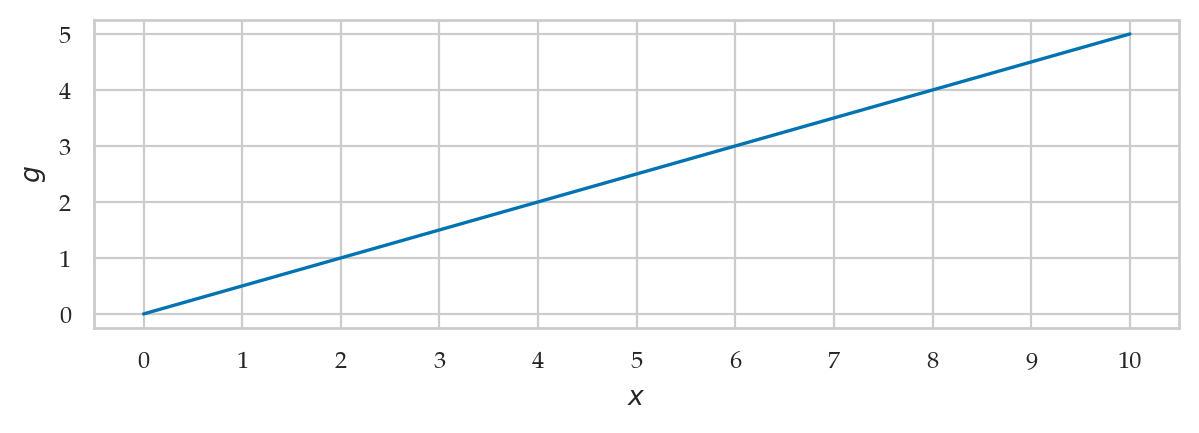

In [5]:
xs = np.linspace(0, 10, 1000)
gs = g(xs)

ax = sns.lineplot(x=xs, y=gs)
ax.set_xticks(range(0,11))
ax.set_xlabel("$x$")
ax.set_ylabel("$g$");

### Integrals

The area under the graph of the function $g$,
between $x=2$ and $x=6$ is calculated using the following integral:

$$
   A_g(2,6) = \int_{x=2}^{x=6} g(x)\,dx = 8.
$$


Text(4.2, 0.6, '$A_g(2,6)$')

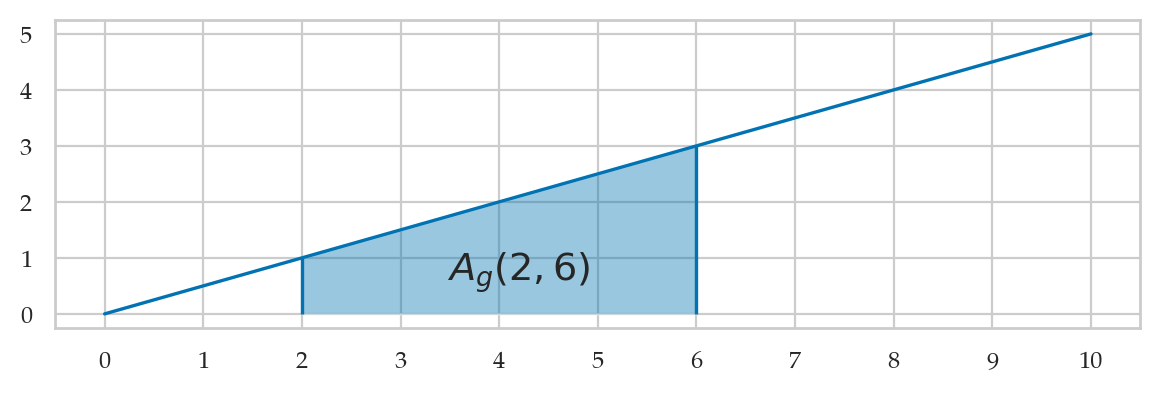

In [6]:
ax = sns.lineplot(x=xs, y=gs)
ax.set_xticks(range(0,11))

# limits of integration
a = 2
b = 6

# highlight the area under g(x) between x=a and x=b
mask = (xs > a) & (xs < b)
ax.fill_between(xs[mask], y1=gs[mask], alpha=0.4)
ax.vlines([a], ymin=0, ymax=g(a))
ax.vlines([b], ymin=0, ymax=g(b))
ax.text((a+b)/2+0.2, 0.6*g(a), "$A_g(2,6)$", ha="center", fontsize="x-large")

In [7]:
from scipy.integrate import quad

quad(g, a=2, b=6)[0]

8.0

Note the `[0]` at the end of the last line of code,
which we use to select the first value of the output.

In [8]:
quad(g, a=2, b=6)

(8.0, 8.881784197001252e-14)

### Integral functions

The integral function $F(b)$ corresponds to the area calculation
with a variable upper limit of integration $A_f(0,b)$.
It is defined as:

$$
  F(b) = A_f(0,b) = \int_{x=0}^{x=b} \! f(x)\,dx.
$$

The integral function of the function $g(x)=\frac{1}{2}x$
is $G(b) = A_g(0,b) = \frac{1}{4}x^2$.




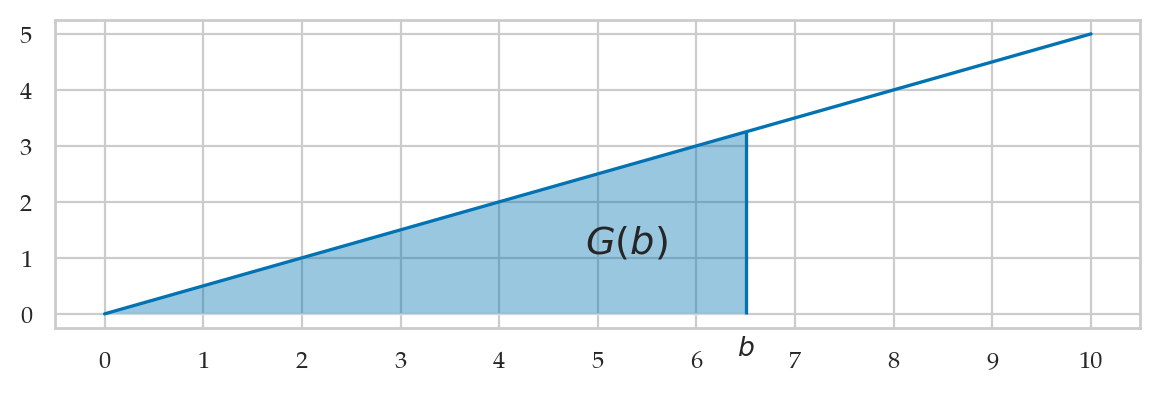

In [9]:
ax = sns.lineplot(x=xs, y=gs)
ax.set_xticks(range(0,11))

# variable upper limit of integration
b = 6.5

# highlight the area under g(x) form x=0 until x=b
mask = (xs > 0) & (xs < b)
ax.fill_between(xs[mask], y1=gs[mask], alpha=0.4)
ax.vlines([b], ymin=0, ymax=g(b))
ax.text(b, -0.4, "$b$", ha="center", va="top")
ax.text(3*b/4, g(b)/3, "$G(b)$", fontsize="x-large");

In [10]:
# TODO: FIGURE showing A_g(2,6) = G(6) - G(2)

## Computer models for random variables

Consider the computer model `rvX` for the random variable $X \sim \mathcal{M}(\theta)$.

We saw previously in [Section 2.1](./21_discrete_random_vars.ipynb#Computer-models-for-random-variables)

TODO: compare and sync with text with Section 2.1

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


### Summary of methods

TODO: import table of methods

### Examples

- The continuous uniform family of distribution $\mathcal{U}(\alpha,\beta)$,
  which assigns equal probabilities to all outcomes in the interval $[\alpha,\beta]$.
  To create a computer model for a continuous uniform distribution $\mathcal{U}(\alpha,\beta)$,
  use the code `uniform(loc=alpha,scale=beta-alpha)`.

- Normal distribution $\mathcal{N}(\mu,\sigma)$ ...
  
  



### Example 1: uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $U \sim \mathcal{U}(0,1)$ is described by the following probability density function:

$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$

For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

In [11]:
# define the computer model `rvU` for the random variable U
from scipy.stats import uniform
alpha = 0
beta = 1
rvU = uniform(loc=alpha, scale=beta-alpha)

#### Plotting the uniform probability density function

Text(0, 0.5, '$f_U$')

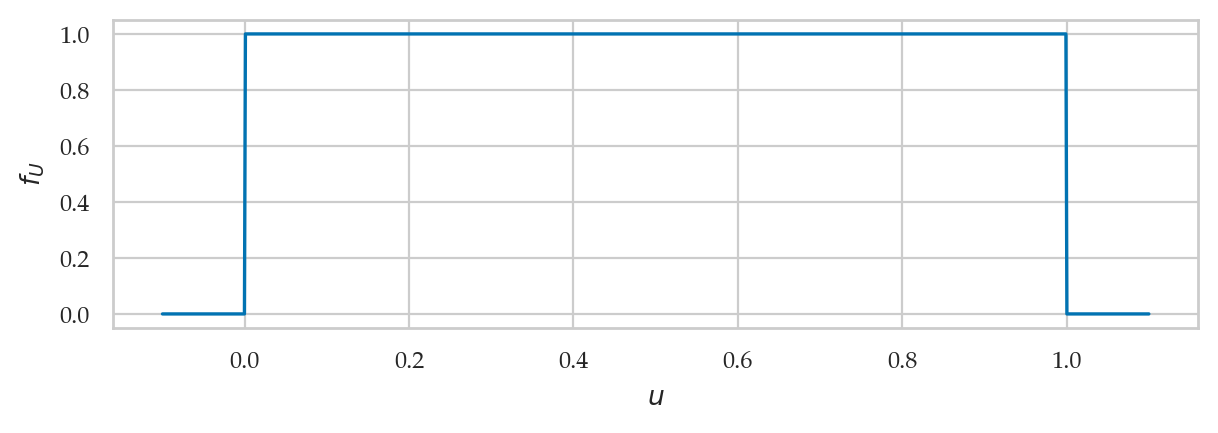

In [12]:
us = np.linspace(-0.1, 1.1, 1000)
fUs = rvU.pdf(us)
ax = sns.lineplot(x=us, y=fUs)
ax.set_xlabel("$u$")
ax.set_ylabel("$f_U$")

Alternatively,
we can use the helper function `plot_pdf` from the `ministats` library
to plot the PDF $f_U$.

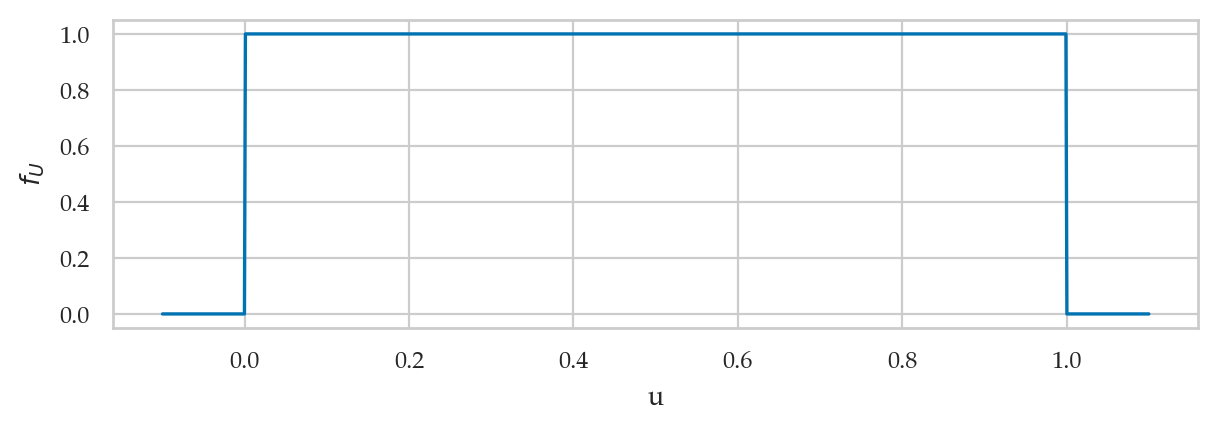

In [13]:
from ministats import plot_pdf
plot_pdf(rvU, xlims=[-0.1, 1.1], rv_name="U");

We can pass the options `a` and `b` to the function `plot_pdf`
to highlight the area that corresponds to
the probability of the event $\{ \texttt{a} \leq U \leq \texttt{b} \}$.

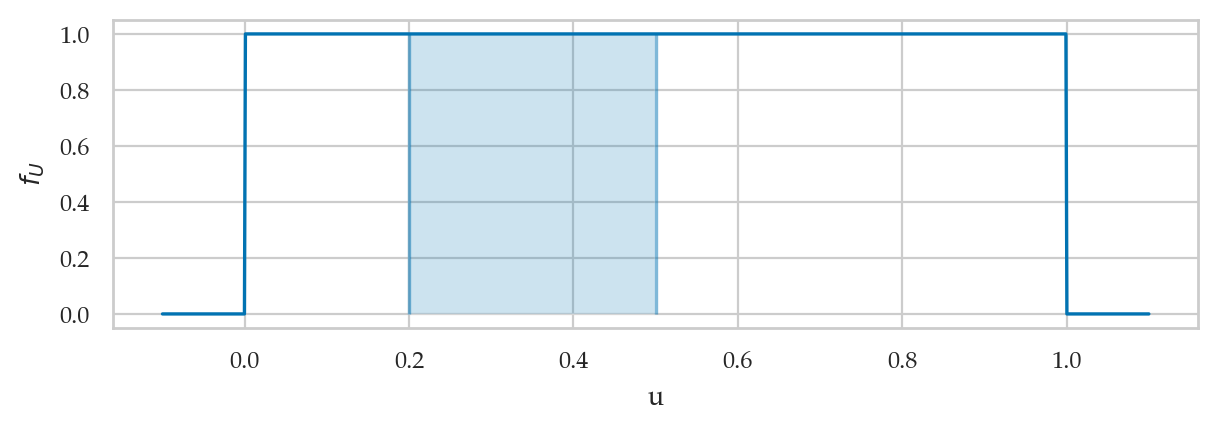

In [14]:
plot_pdf(rvU, xlims=[-0.1, 1.1], rv_name="U", a=0.2, b=0.5);

#### Calculating the probability of an event

TODO: math

In [15]:
# use `quad` function to integrate rvU.pdf between 0.2 and 0.5
from scipy.integrate import quad
quad(rvU.pdf, a=0.2, b=0.5)[0]

0.3

The total area under the graph of $f_U$ is equal to $1$.

In [16]:
quad(rvU.pdf, a=0, b=1)[0]

1.0

### Example 2: standard normal distribution

A standard normal random variable $Z \sim \mathcal{N}(\mu=0,\sigma=1)$
is described by the probability density function:

$$ 
  f_Z(z)	= 	\tfrac{1}{\sqrt{2\pi}} e^{ -\frac{z^2}{2} }.
$$

The mean $\mu_Z=0$ (the Greek letter *mu*) and the standard deviation $\sigma_Z=1$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$
is used to describe the whole family of normal probability distributions,
and $Z \sim \mathcal{N}(\mu_Z=0, \sigma_Z=1)$
is a particular instance of the distribution with mean $\mu_Z = 0$
and standard deviation $\sigma_Z = 1$.

In [17]:
# define the computer model `rvZ` for the random variable Z
from scipy.stats import norm
muZ = 0
sigmaZ = 1
rvZ = norm(muZ, sigmaZ)

#### Plotting the normal probability density function

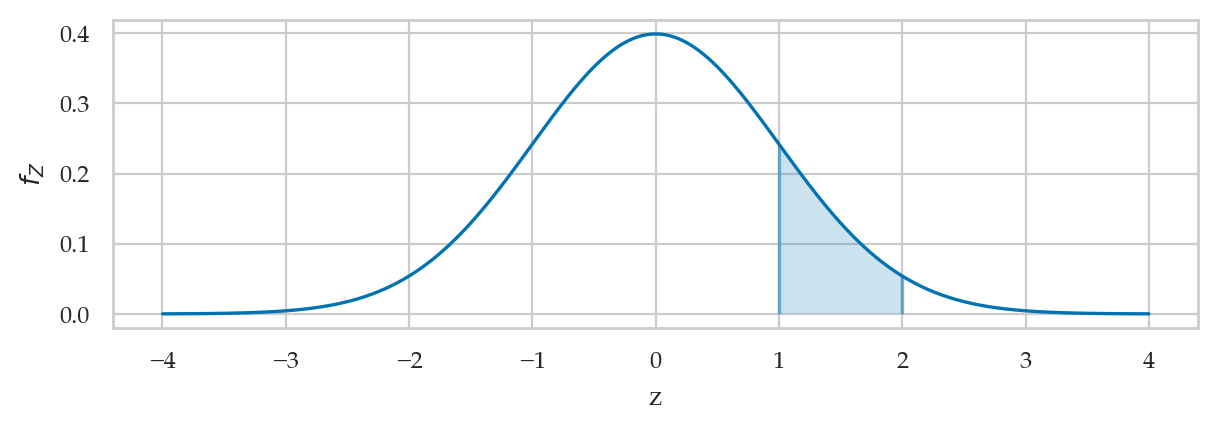

In [18]:
from ministats import plot_pdf

plot_pdf(rvZ, xlims=[-4,4], rv_name="Z", a=1, b=2);

#### Calculating the probability of an event

The code example below shows the calculation of the probability $\Pr\!\left( \{ 1 \leq Z \leq 2 \} \right)$,
which corresponds to the integral $\int_{z=1}^{z=2} f_Z(z) dz$.

We use the `quad` function to integrate `rvZ.pdf` between $z=1$ and $z=2$.

In [19]:
from scipy.integrate import quad
quad(rvZ.pdf, a=1, b=2)[0]

0.13590512198327787

The total area under the graph of $f_Z$ is equal to $1$.

To verify this claim,
we would need to compute $\int_{u=-\infty}^{u=\infty} f_Z(z)\,dz$,
but the values of $f_Z$ drop off to zero very quickly outside the central region,
so it is sufficient to compute the integral
$\int_{u=-10}^{u=10} f_Z(z)\,dz$,
which extends 10 standard deviations to the left and 10 standard deviaitons to the right.

In [20]:
quad(rvZ.pdf, a=-10, b=10)[0]

1.0000000000000002

## Cumulative distribution functions

Definitions:

- $F_X$:
  the **cumulative distribution function** (CDF) tells us the probability of an outcome
  less than or equal to a given value: $F_X(b) = Pr(\{ X \leq b \})$.
- $F_X^{-1}$:
  the inverse cumulative distribution function computes contains the information
  about the quantiles of the probability distribution.
  The value $F_X^{-1}(q)=x_q$ tells how far you need to go in the sample space
  so that the event $\{ X \leq x_q \}$ contains a proportion $q$ of the total probability:
  $\Pr(\{ X \leq x_q \})=q$.

### Example 1 (continued): uniform random variable

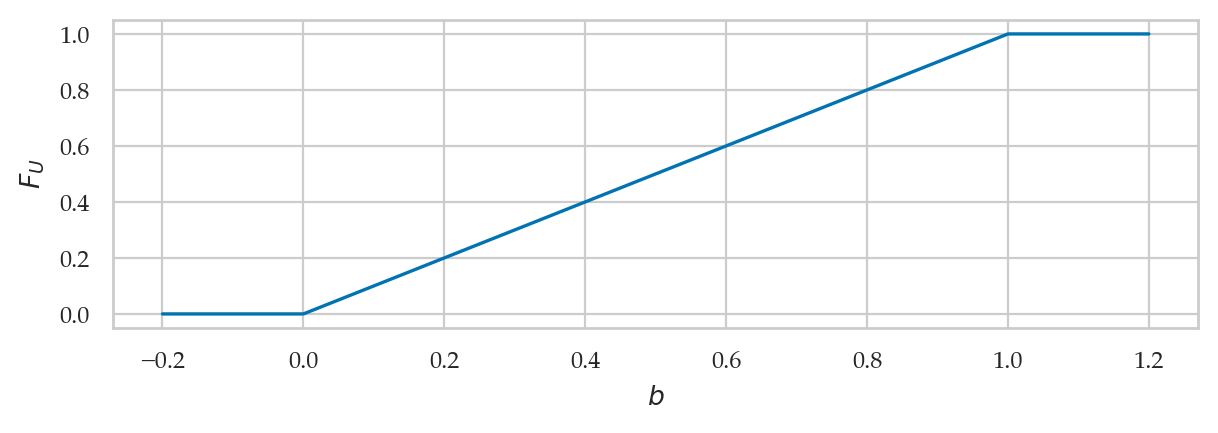

In [21]:
bs = np.linspace(-0.2, 1.2, 1000)
FUs = rvU.cdf(bs)
ax = sns.lineplot(x=bs, y=FUs)
ax.set_xlabel("$b$")
ax.set_ylabel("$F_U$");

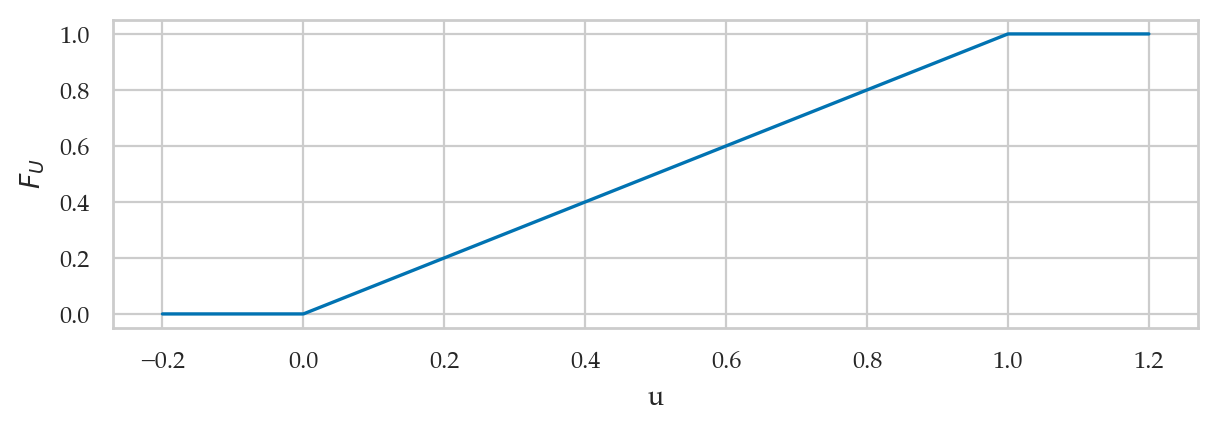

In [22]:
from ministats import plot_cdf
plot_cdf(rvU, xlims=[-0.2,1.2], rv_name="U");

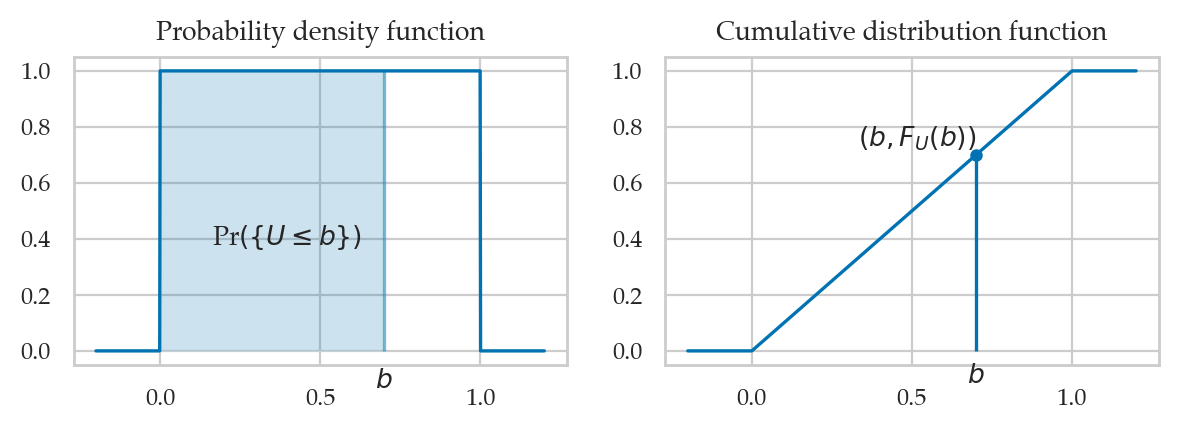

In [23]:
from ministats import plot_pdf_and_cdf
plot_pdf_and_cdf(rvU, b=0.7, xlims=[-0.2,1.2], rv_name="U");

In [24]:
rvU.cdf(0.5) - rvU.cdf(0.2)

0.3

In [25]:
quad(rvU.pdf, a=0.2, b=0.5)[0]

0.3

### Example 2 (continued): normal random variable

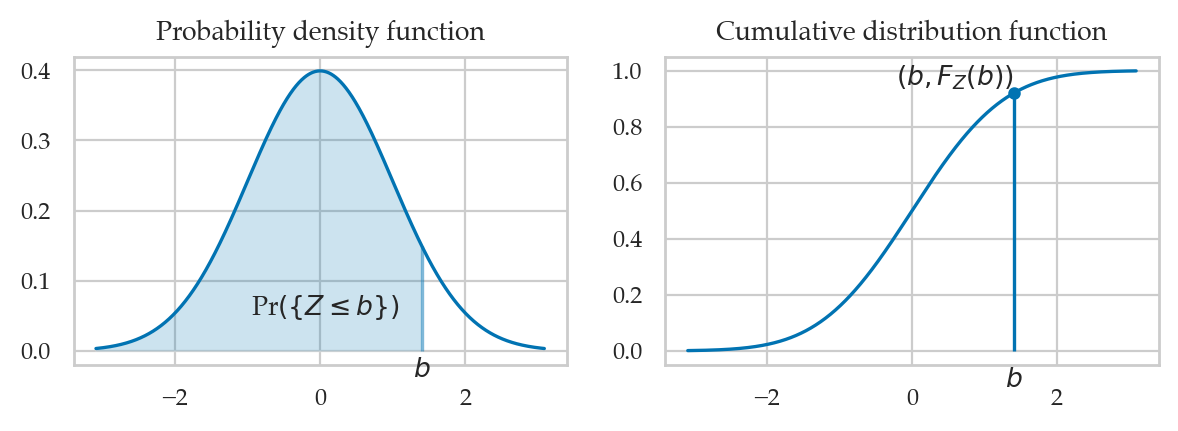

In [26]:
plot_pdf_and_cdf(rvZ, b=1.4, rv_name="Z");

In [27]:
rvZ.cdf(2) - rvZ.cdf(1)

0.13590512198327787

In [28]:
quad(rvZ.pdf, a=1, b=2)[0]

0.13590512198327787

#### Inverse of the cumulative distribution function

In [29]:
rvZ.ppf(0.95)

1.6448536269514722

In [30]:
rvZ.cdf(1.6448536269514722)

0.95

In [31]:
[rvZ.ppf(0.05), rvZ.ppf(0.95)]

[-1.6448536269514729, 1.6448536269514722]

## Calculating expectations

We denote $\mathbb{E}_X[w]$ the *expected value* of the function $w(X)$
computes the average value of $w(X)$ computed for all the possible values of the random variable $X$.

### Example 1: mean and variance of the uniform distribution


#### Mean

$$
    \mu_U = \mathbb{E}_U[U] 
        =	\int_0^1 u f_U(u) \; du		
        =	\int_0^1 u \cdot 1 \; du
        = 	\tfrac{1}{2}.
$$

In [32]:
rvU.mean()

0.5

In [33]:
# # ALT. manual integration
# quad(lambda u: u*rvU.pdf(u), a=0, b=1)[0]

So the mean is $\mu_U = \frac{1}{2} = 0.5$.

#### Variance

The formula for the variance is

$$
    \sigma_U^2
        = \mathbb{E}_U\!\left[ (U-\mu_U)^2 \right]
        = \int_0^1 (u- \tfrac{1}{2})^2 \cdot f_U(u) \; du.
$$

In [34]:
rvU.var()

0.08333333333333333

In [35]:
# # ALT. manual integration
# quad(lambda u: (u-0.5)**2*rvU.pdf(u), a=0, b=1)[0]

So the variance of $U$ is $\sigma_U^2 = 0.08\overline{3} = \frac{1}{12}$.

We can compute the standard deviation $\sigma_U$ (the square root of the variance)
by calling the method `rvu.std`.

In [36]:
rvU.std()

0.28867513459481287

### Example 2: mean and variance of a normal distribution


$$ 
  f_Z(z)	= 	\tfrac{1}{\sqrt{2\pi}} e^{ -\frac{z^2}{2} }.
$$


The mean of $Z$ is

In [37]:
rvZ.mean()

0.0

The variance of $Z$ is

In [38]:
rvZ.var()

1.0

In [39]:
rvZ.std()

1.0

In [40]:
# ALT. manual integration
# quad(lambda z: (z-0)**2*rvZ.pdf(z), a=-10, b=10)[0]

### Skewness and kurtosis

In [41]:
rvZ.stats(moments="s")

0.0

In [42]:
rvZ.stats(moments="k")

0.0

## Kombucha volume example


A random variable $K$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu_K,\sigma_K)$ is described by the probability density function:

$$ 
 f_K(k) = \tfrac{1}{\sigma_K\sqrt{2\pi}} e^{\small -\tfrac{(k-\mu_K)^2}{2\sigma_K^2}}.
$$

The mean $\mu_K$ (the Greek letter *mu*) and the standard deviation $\sigma_K$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$
is used to describe the whole family of normal probability distributions,
and $K \sim \mathcal{N}(\mu_K=1000, \sigma_K=10)$
is a particular instance of the distribution with mean $\mu_K = 1000$
and standard deviation $\sigma_K = 10$.


Create a normal random variable with mean 1000 and standard deviation 10.


In [43]:
from scipy.stats import norm

muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

In [44]:
# type(rvK)

In [45]:
# MAYBE: rvK.pdf = def fK(k) ... show Python function 

### Plotting the probability density function

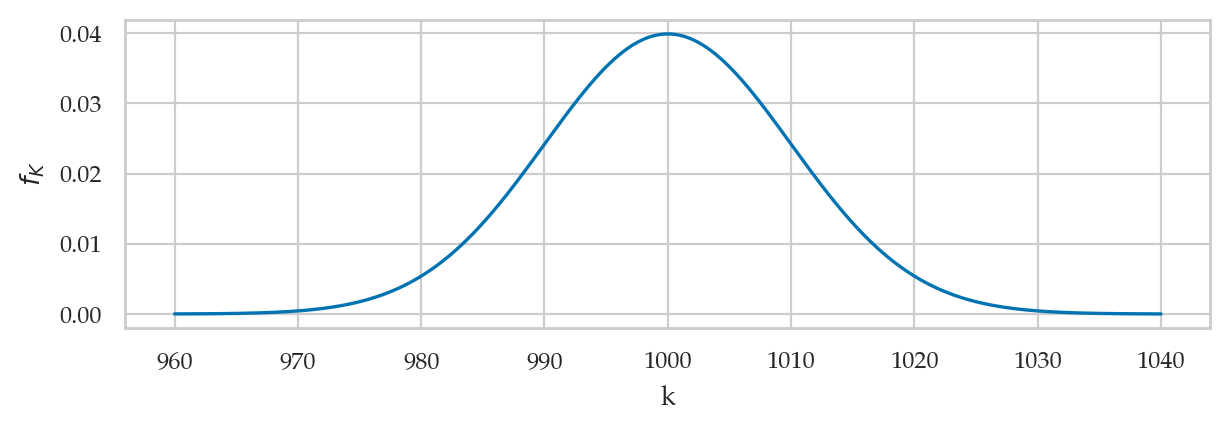

In [46]:
from ministats import plot_pdf

plot_pdf(rvK, xlims=[960,1040], rv_name="K");

The cumulative distribution is the integral of the probability density function:

$$
   F_K(b) = \textrm{Pr}(\{K \leq b\}) = \int_{-\infty}^b f_K(k) \, dk.
$$


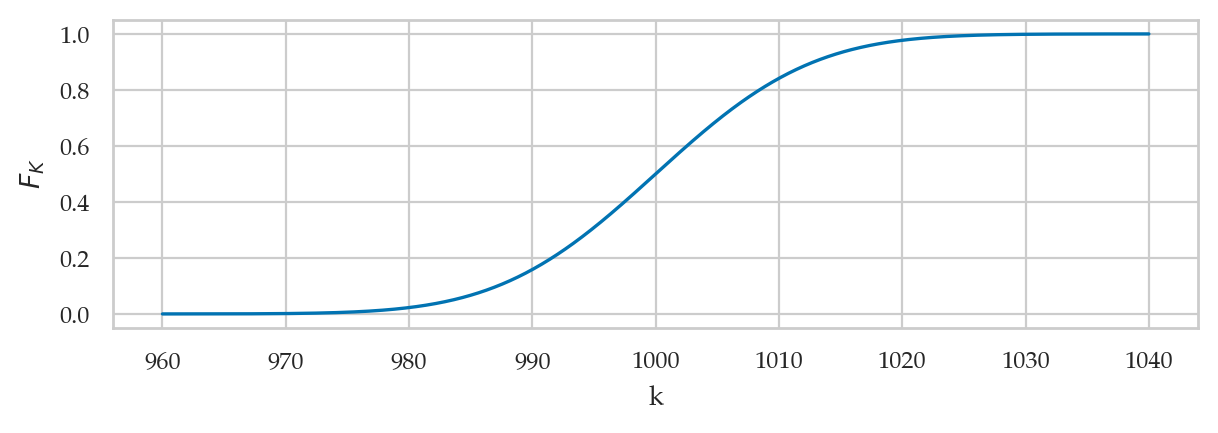

In [47]:
from ministats import plot_cdf

plot_cdf(rvK, xlims=[960,1040], rv_name="K");

The inverse of the cumulative distribution function $F_K^{-1}$
is available as method `rvK.ppf`.

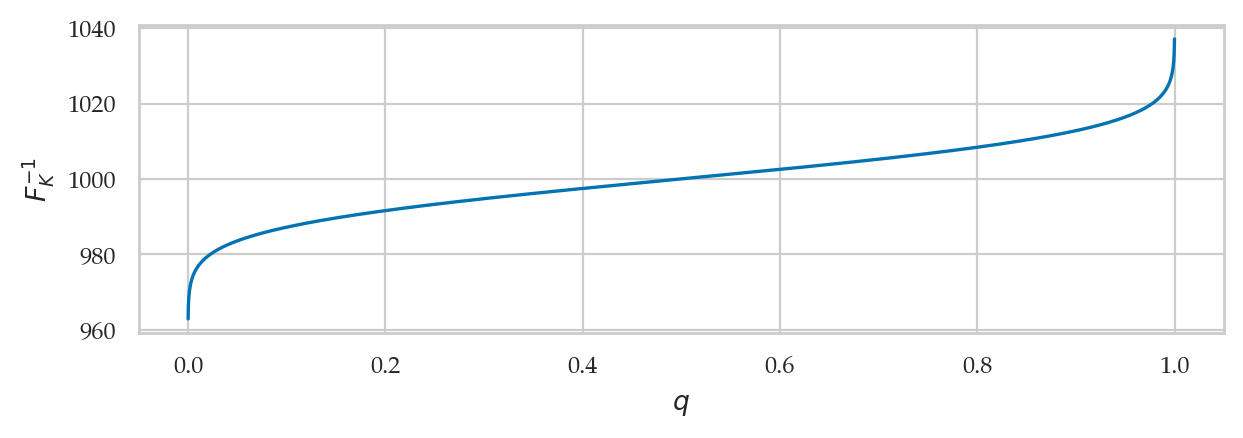

In [48]:
qs = np.linspace(0, 1, 10000)
invFqs = rvK.ppf(qs)
ax = sns.lineplot(x=qs, y=invFqs)
ax.set_xlabel("$q$")
ax.set_ylabel("$F_K^{-1}$");

### Properties of the distribution

In [49]:
rvK.mean()

1000.0

In [50]:
rvK.var()

100.0

In [51]:
rvK.std()

10.0

In [52]:
rvK.median()

1000.0

In [53]:
rvK.support()

(-inf, inf)

### Computing probabilities

Suppose you want to compute the probability of the outcome $\{ 980 \leq K \leq 1020 \}$
for the random variable $K$.

Option A: Obtain $\textrm{Pr}(\{980 \leq N \leq 1020\})$ by calculating the integral of $f_K$ between 980 and 1020.

In [54]:
quad(rvK.pdf, 980, 1020)[0]

0.9544997361036411

Option B: Obtain $\textrm{Pr}(\{980 \leq N \leq 1020\})$
by calculating the difference in the CDF $F_K$,
$\textrm{Pr}(\{980 \leq K \leq 1020\}) = F_K(1020) - F_K(980)$.

In [55]:
rvK.cdf(1020) - rvK.cdf(980)

0.9544997361036416

### Computing quantiles

Suppose we want to find the interval $(-\infty, k_q]$
that contains proportion $q$ of the total probability.
We can fing $k_q$ by calling the inverse CDF funciton $F_K^{-1} = \texttt{rvK.ppf}$.

#### First quartile
The first quartile ($q=0.25$ quantile) is located at $F_K^{-1}(0.25)$:

In [56]:
rvK.ppf(0.25)

993.2551024980392

We can verify that $\Pr(\{K \leq 993.255\}) = 0.25$ by calling `rvK.cdf` with that value.

In [57]:
rvK.cdf(993.2551024980392)

0.24999999999999895

#### Second quartile = the median

In [58]:
rvK.ppf(0.5)

1000.0

#### Third quartile

In [59]:
rvK.ppf(0.75)

1006.7448975019608

#### Left tail

In [60]:
rvK.ppf(0.05)

983.5514637304852

#### Right tail

In [61]:
rvK.ppf(0.95)

1016.4485362695148

#### Computing confidence intervals

To compute a 90% confidence interval for the random variable $K$,
we can call the `rvK.ppf()` twice.

In [62]:
[rvK.ppf(0.05), rvK.ppf(0.95)]

[983.5514637304852, 1016.4485362695148]

### Generating random observations

Let's say you want to generate $n=100$ observations from the random variable $K$.
You can do this by calling the method `rvK.rvs(100)`.

In [63]:
np.random.seed(46)

ksample = rvK.rvs(100)
ksample[0:3]

array([1005.8487584 , 1012.3119574 , 1008.21900264])

#### Sample mean

In [64]:
np.mean(ksample)

999.3321800993151

#### Sample standard deviation

In [65]:
np.std(ksample, ddof=1)

9.234629119029867

### Computing expectations

Suppose the distributor accepts only bottles contain between 980 ml and 1020 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [66]:
def payment(k):
    if 980 <= k and k <= 1020:
        return 2
    else:
        return 0

In [67]:
# get paid if in spec
payment(1005)

2

In [68]:
# don't get paid if out of spec
payment(1025)

0

In [69]:
# expected value of payment
rvK.expect(payment, lb=-np.inf, ub=np.inf)

1.9089994604952036

Visually speaking, only the middle part of the probability distribution "counts" towards the payment.
The subset that contributes to the expectation can be visualized as the values inside the rectangular region shown below.

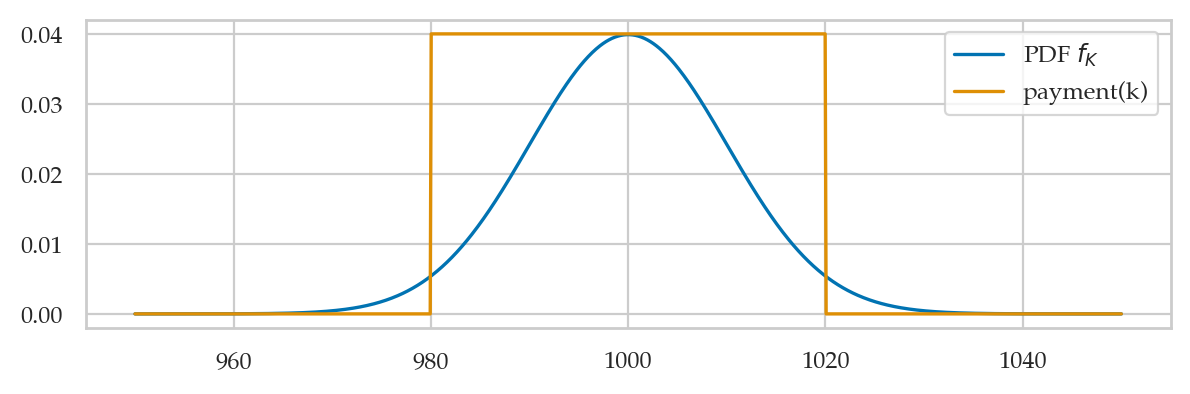

In [70]:
ks = np.linspace(950, 1050, 1000)
payments = [payment(k)/50 for k in ks]

sns.lineplot(x=ks, y=rvK.pdf(ks), label="PDF $f_K$")
sns.lineplot(x=ks, y=payments, label="payment(k)");

## Discussion

### Bulk of the normal distribution

How much of the total probability lies within $n$ standard deviations of the mean?

$$
\textrm{Pr}(\{\mu_K - n\sigma_K \leq K \leq \mu_K + n\sigma_K\}) \; = \; p_n.
$$

In [71]:
from scipy.stats import norm
rvK = norm(1000, 10)

In [72]:
from scipy.integrate import quad

muK = rvK.mean()    # mean of the random variable rvK
sigmaK = rvK.std()  # standard deviation of rvK

for n in [1, 2, 3]:
    I_n = [muK - n*sigmaK, muK + n*sigmaK]
    p_n = quad(rvK.pdf, I_n[0], I_n[1])[0]
    print(f"p_{n} = Pr( K in {I_n} ) = {p_n:.3f}")

p_1 = Pr( K in [990.0, 1010.0] ) = 0.683
p_2 = Pr( K in [980.0, 1020.0] ) = 0.954
p_3 = Pr( K in [970.0, 1030.0] ) = 0.997


The code below highlights the interval $I_n$ and computes the probability $p_n$.
Change the value of the variable `n` to get different plots.

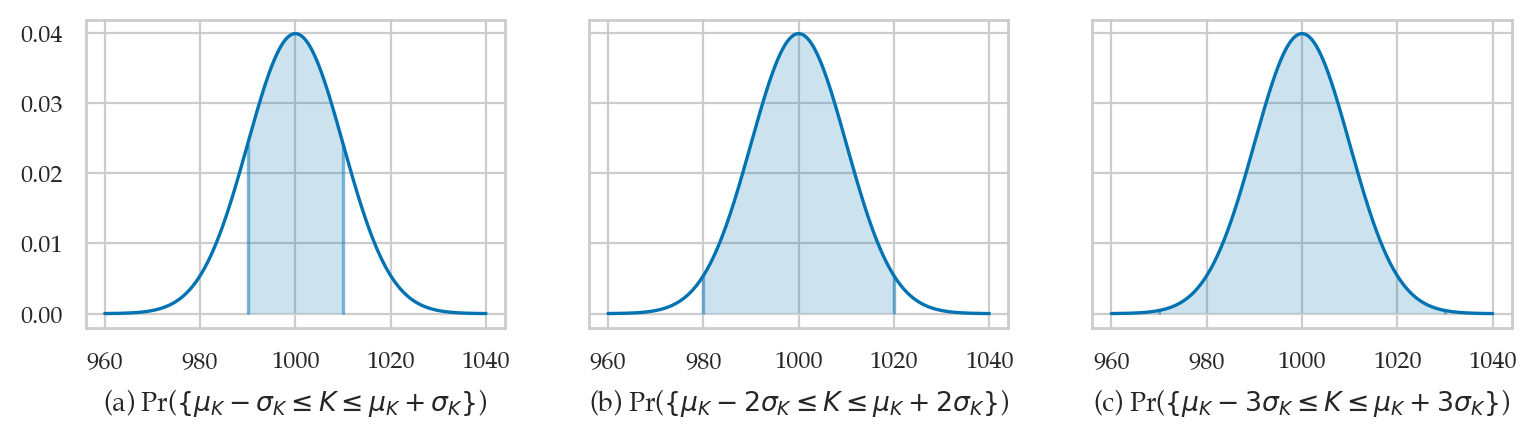

In [73]:
from ministats.book.figures import bulk_of_pdf_panel

bulk_of_pdf_panel(rvK, rv_name="K", xlims=[960, 1040]);

0.9544997361036411

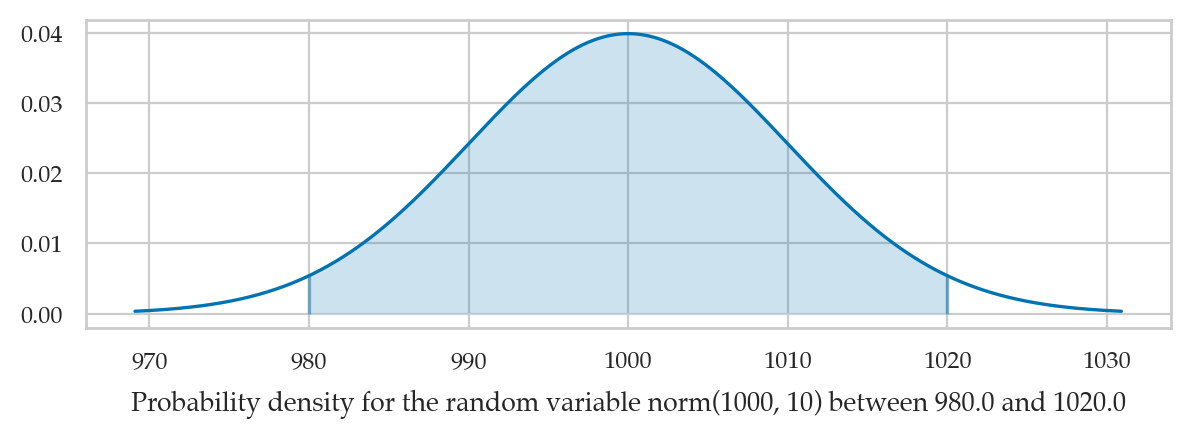

In [74]:
from ministats import calc_prob_and_plot

n = 2  # number of standard deviations around the mean

# values of x in the interval 𝜇 ± n𝜎 = [𝜇-n𝜎, 𝜇+n𝜎]
I_n = [muK - n*sigmaK, muK + n*sigmaK]
p_n, _ = calc_prob_and_plot(rvK, I_n[0], I_n[1])
p_n

Try changing the value of the variable `n` to 1 or 3 in the above code cell.

### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [75]:
muK = rvK.mean()    # mean of the random variable rvK
sigmaK = rvK.std()  # standard deviation of rvK

for n in [1, 2, 3]:
    # compute the probability in the left tail (-∞,𝜇-n𝜎]
    x_l = muK - n*sigmaK
    p_l = quad(rvK.pdf, -np.inf, x_l)[0]
    # compute the probability in the right tail [𝜇+n𝜎,∞)
    x_r = muK + n*sigmaK
    p_r = quad(rvK.pdf, x_r, np.inf)[0]
    # add together to get total probability in the tails
    p_tails = p_l + p_r
    print(f"Pr({{K<{x_l} or K>{x_r}}}) = {p_tails:.4f}")

Pr({K<990.0 or K>1010.0}) = 0.3173
Pr({K<980.0 or K>1020.0}) = 0.0455
Pr({K<970.0 or K>1030.0}) = 0.0027


The code below highlights the tails of the distribution.

Pr( {K<980.0} ∪ {K>1020.0} ) = 0.0455


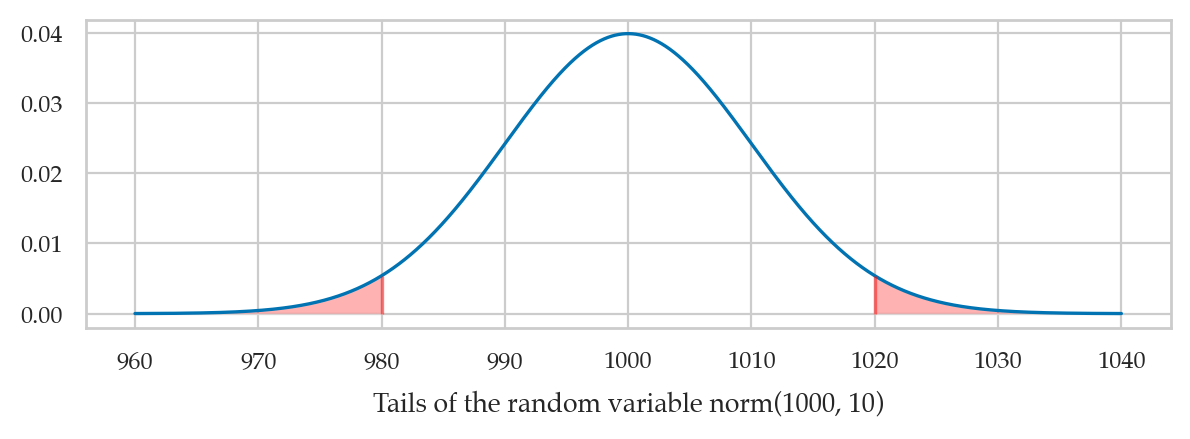

In [76]:
from ministats import calc_prob_and_plot_tails

muK = rvK.mean()    # mean of the random variable rvK
sigmaK = rvK.std()  # standard deviation of rvK

n = 2  # number of standard deviations around the mean

# the distribution's left tail (-∞,𝜇-k𝜎]
x_l = muK - n*sigmaK

# the distribution's right tail [𝜇+k𝜎,∞)
x_r = muK + n*sigmaK

p_tails, _ = calc_prob_and_plot_tails(rvK, x_l, x_r, xlims=[960, 1040])

print(f"Pr( {{K<{x_l}}} ∪ {{K>{x_r}}} ) = {p_tails:.4f}")

Try changing the value of the variable `n` in the above code cell.

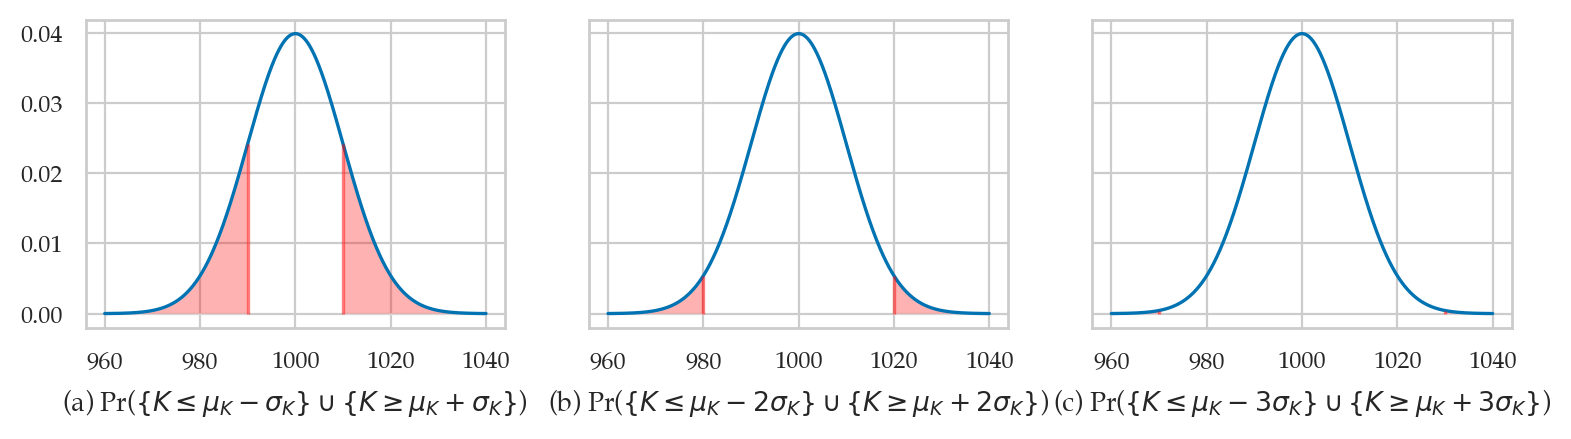

In [77]:
from ministats.book.figures import tails_of_pdf_panel

tails_of_pdf_panel(rvK, rv_name="K", xlims=[960,1040]);

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are approximately $n=2$ standard deviations away from the mean (more precisely $n=1.96$ to get exactly 5%).
We'll use this facts later in Chapter 3 to define events that are less than 5\% likely to occur by chance.

## Exercises

## Links